In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# CONSTANT Variables 
NUM_SOURCE = 6
X1 = 21
X2 = 21
V = 441
N = 240

### Question 1.1

In [3]:
def over_N(tc, N):
    """ Check whether numpy array tc is over length of the temporal source
    tc : numpy array of temporal source, TC
    N : integer of the length of each temporal source
    
    Return : True or False
    """
    if len(tc) >= N:
        return True
    else:
        return False

def standardise(tc):
    """ Standardise TC
    tc : numpy array
    
    Return : numpy array of standardised TC
    """
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    return tc
    
def construct(AV, IV, duration):
    """ Construct matrix TC of size 240 x 6 consisting of six temporal sources using three vectors
    AV : onset arrival vector
    IV : increment vector
    duration : duration of ones 
    
    Return : numpy array of matrix TC. 
    """
    
    # Initialise value 
    iv_count = IV
    tc = np.array([])
    
    # onset arrival vector. Fills zeroes to tc
    tc = np.zeros(AV)
    
    
    while len(tc) < N:
        # build up duration of ones
        for i in range(duration):
            if over_N(tc, N) == True:
                break
            # Add ones into TC. 
            tc = np.append(tc, 1)

        # incremeting the vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # build up onsets arrival vector
        for i in range(AV):
            if over_N(tc, N) == True:
                break
            tc = np.append(tc, 0)
        
    # Standardise TC
    tc = standardise(tc)
    
    return tc

In [4]:
# Construct matrix TC
tc1 = construct(0, 30, 15)
tc2 = construct(20, 45, 20)
tc3 = construct(0, 60, 25)
tc4 = construct(0, 40, 15)
tc5 = construct(0, 40, 20)
tc6 = construct(0, 40, 25)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

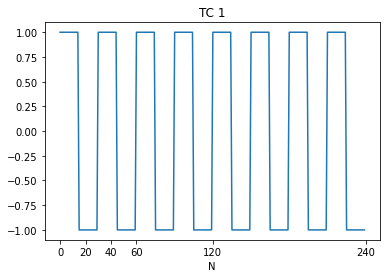

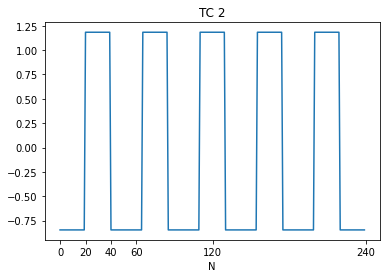

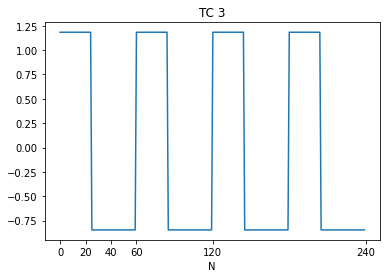

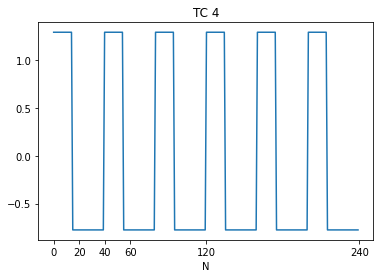

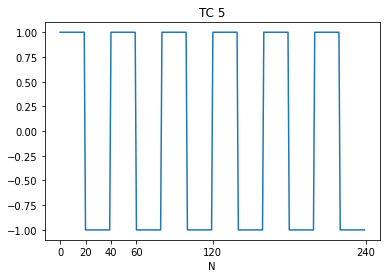

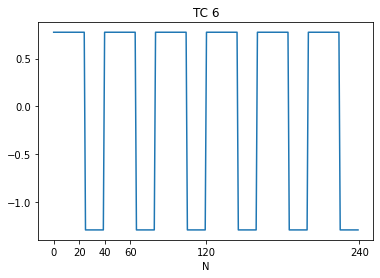

In [5]:
# Plot each source TCs 
count = 0
for tc in TC:
    count += 1
    plt.plot(tc)
    plt.title("TC " + str(count))
    plt.xlabel("N")
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.savefig('plots/TC_'+str(count)) #save plots
    plt.show()

### Question 1.2¶

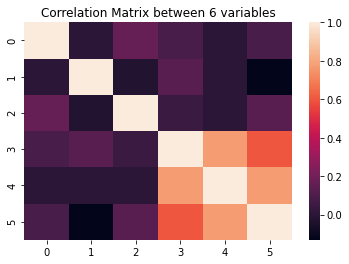

In [6]:
tc_df = pd.DataFrame(TC)
tc_df = tc_df.T
# Build up a correlation matrix between 6 variables 
ax = sns.heatmap(tc_df.corr())
plt.title("Correlation Matrix between 6 variables");
plt.savefig('plots/CM_TC')

### Question 1.3

In [7]:
def slice_one(hori_start, hori_finish, verti_start, verti_finish):
    """ Construct an array tmpSM of size (21 x 21) consisting of ones and zeros, by 
    placing ones at these pixels along "vertical, horizontl" directoon of the slice
    
    hori_start : integer of the starting point of placing one in horizontal direction 
    hori_finish : integer of the finishing point of placing one in horizontal direction 
    verti_start : integer of the starting point of placing one in vertical direction 
    verti_finish : integer of the finishing point of placing one in vertical direction 
    
    Return : an array tmpSM of size 21x21
    """
    tmp_sm = np.zeros(V).reshape((X1,X2))
    
    for row in range(hori_start-1, hori_finish):
        for col in range(verti_start-1, verti_finish):
            # Place one
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [8]:
# Construct array tmpSM of 6 different sources 
tmp1 = slice_one(2, 6, 2, 6)
tmp2 = slice_one(2, 6, 15, 19)
tmp3 = slice_one(8, 13, 2, 6)
tmp4 = slice_one(8, 13, 15, 19)
tmp5 = slice_one(15, 19, 2, 6)
tmp6 = slice_one(15, 19, 15, 19)
# Construct an array tmpSM of size 6 x (21 x 21) 
tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

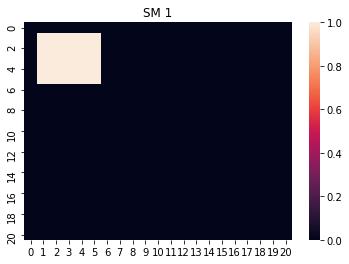

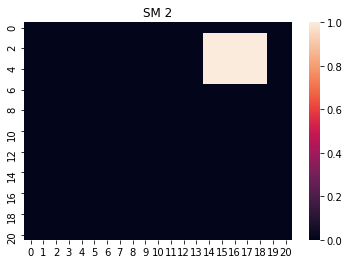

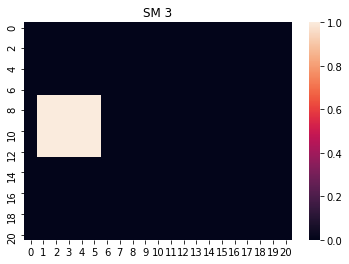

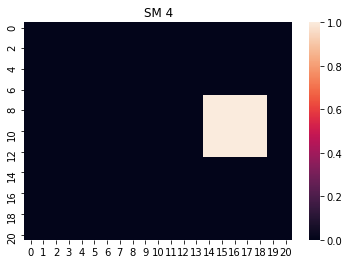

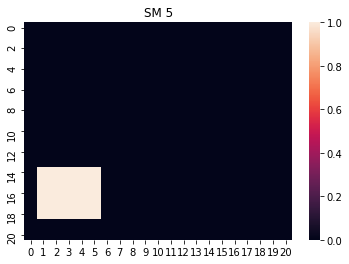

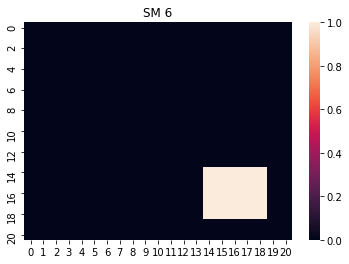

In [9]:
count = 0
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    count += 1
    ax = sns.heatmap(tmp_df)
    plt.title("SM " + str(count))
    plt.savefig('plots/SM_'+str(count))
    plt.show()

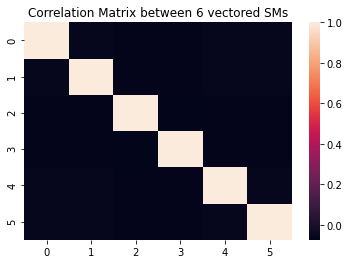

In [10]:
# Reshape SM to size 6 X 441
SM = tmpSM.reshape((NUM_SOURCE, V))

sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
# Build up a correlation matrix between 6 vectored SMs
sns.heatmap(sm_df.corr())
plt.title("Correlation Matrix between 6 vectored SMs")
plt.savefig('plots/CM_SM');

### Question 1.4

In [11]:
def contruct_gaussian_noise(mean, variance, length):
    """ Construct white Gaussian noise
    mean : mean of the gaussian noise, integer
    variance : variance of the gaussian noise, integer
    length : length of the gaussian noise, integer
    
    Return : a numpy array of gaussian noise 
    """
    noise = np.array([gauss(mean, math.sqrt(variance)) for i in range(length * NUM_SOURCE)])
    return noise

In [12]:
temp_noise = contruct_gaussian_noise(0.0, 0.25, N)
temp_noise = temp_noise.reshape((N,NUM_SOURCE))

spatial_noise = contruct_gaussian_noise(0.0, 0.015, V)
spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

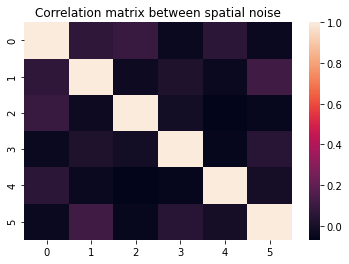

In [13]:
# Correlation matrix between spatial noise
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
sns.heatmap(snoise_df.corr())
plt.title("Correlation matrix between spatial noise");
plt.savefig('plots/CM_SpatialNoise');

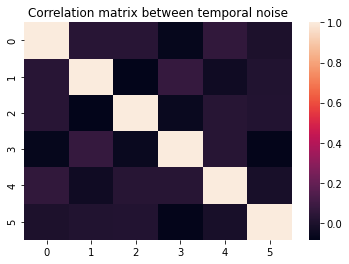

In [14]:
# Correlation matrix between temporal noise
tnoise_df = pd.DataFrame(temp_noise)
sns.heatmap(tnoise_df.corr())
plt.title("Correlation matrix between temporal noise");
plt.savefig('plots/CM_TemporalNoise');

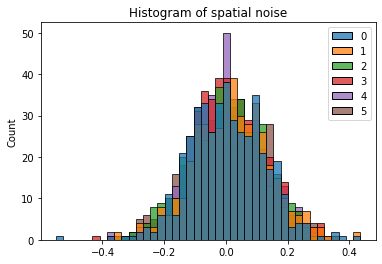

In [15]:
# Histogram of spatial noise
sns.histplot(data=snoise_df)
plt.title("Histogram of spatial noise");
plt.savefig('plots/Histogram_SpatialNoise');

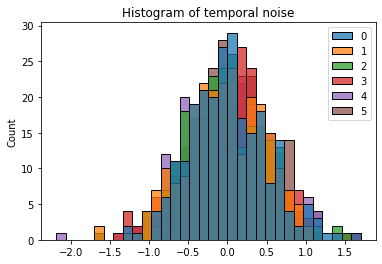

In [16]:
# Histogram of temporal noise
sns.histplot(data=tnoise_df)
plt.title("Histogram of temporal noise");
plt.savefig('plots/Histogram_TemporalNoise');

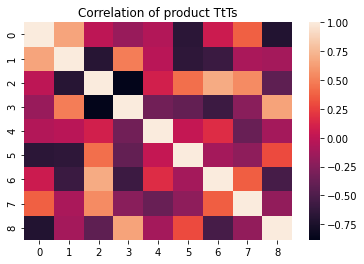

In [17]:
# Build up product TtTs
TtTs = np.dot(temp_noise, spatial_noise)

ttts_df = pd.DataFrame(TtTs)
# Correlation of product TtTs of a subset of TtTs
mini_ttts = ttts_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
sns.heatmap(mini_ttts.corr())
plt.title("Correlation of product TtTs");
plt.savefig('plots/CM_TtTs');

### Question 1.5

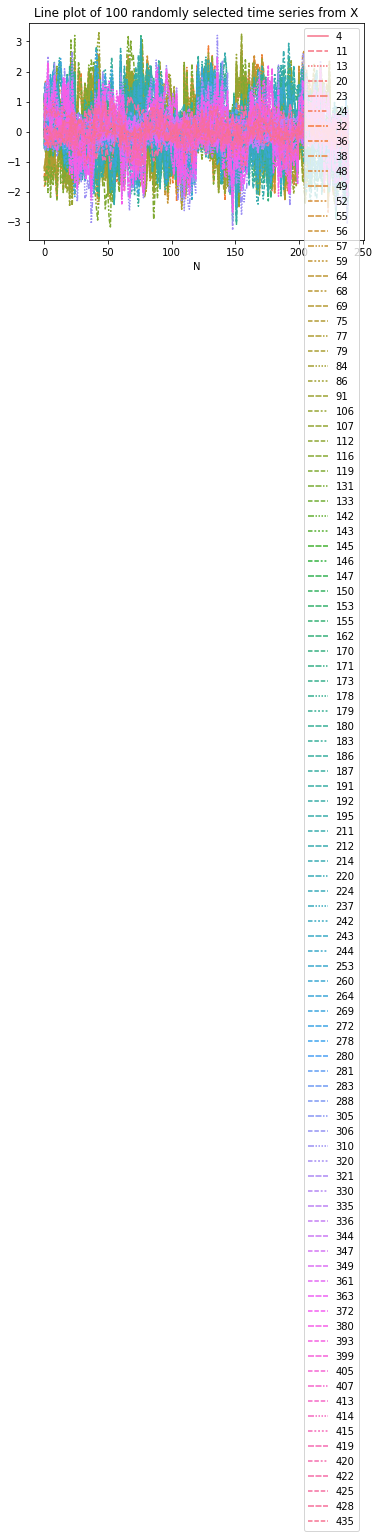

In [18]:
TC = np.transpose(TC)
# Build up standardised X 
X = np.dot((TC + temp_noise), (SM + spatial_noise))
X_df = pd.DataFrame(X)
# Randomly select 100 time-series from X
randomly_selected = random.sample(list(range(0,V)), 100)
sample = X_df[randomly_selected]
# Plot 100 randomly selected time series from X
sns.lineplot(data = sample)
plt.title("Line plot of 100 randomly selected time series from X");
plt.xlabel("N")
plt.savefig('plots/Lineplot_randomX');

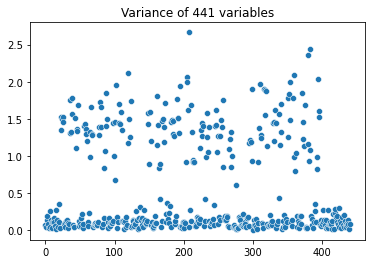

In [19]:
# Get variance of X acriss 441 variables
var = np.var(X_df)
# Plot variance of 441 variables
sns.scatterplot(data = var)
plt.title("Variance of 441 variables");
plt.savefig('plots/Variance_X');

In [20]:
# Standardise X
X = standardise(X)

### Question 2.1

In [21]:
def solve_lsr(TC, X):
    """ 
    Solve a Least Square Regression (LSR) model given :
    TC : a numpy matrix of 240 x 6
    X : a numpy matrix of 240 x 441
    
    Returns: 4 numpy arrays which are processed in the LSR model 
    """
    DTD = np.dot(np.transpose(TC), TC)
    DTD_inv = np.linalg.inv(DTD)
    DTX = np.dot(np.transpose(TC), X)
    A_lsr = np.dot(DTD_inv, DTX)
    D_lsr = np.dot(X, np.transpose(A_lsr))
    return DTD, DTD_inv, DTX, A_lsr, D_lsr

In [22]:
# Solve LSR 
DTD, DTD_inv, DTX, A_lsr, D_lsr = solve_lsr(TC, X)

In [23]:
# Reshape Retrieval of SM, A to size 21 x 21
Alsr = []
for row in A_lsr:
    Alsr.append(row.reshape((X1, X2)))

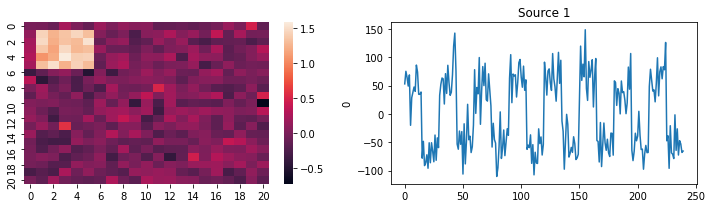

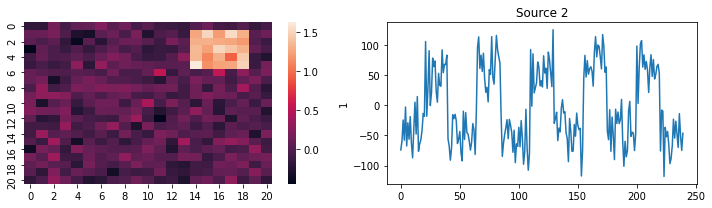

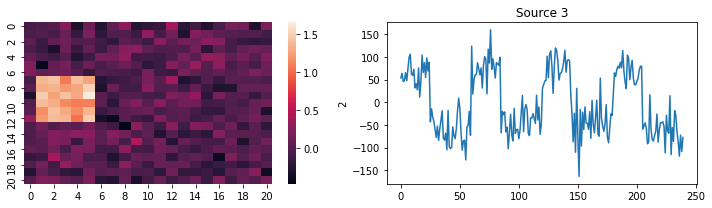

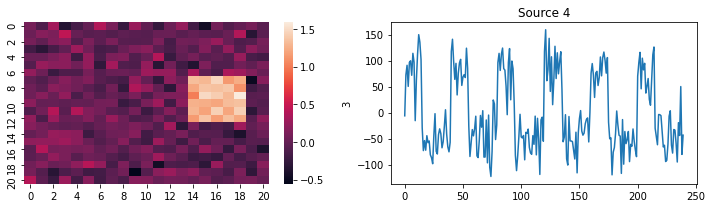

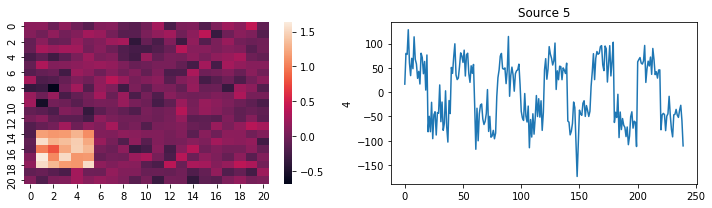

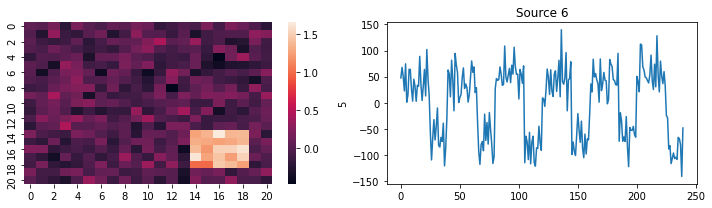

In [24]:
# Plot the retrieval SM and TC which are A and D of LSR 
dlsr_df = pd.DataFrame(D_lsr)
for col in range(0, NUM_SOURCE):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    sns.heatmap(data = Alsr[col], ax = axes[0])
    sns.lineplot(data=dlsr_df[col], ax = axes[1])
    plt.title("Source " + str(col+1))
    plt.tight_layout()
    plt.savefig("plots/LSR_source"+str(col+1))
    plt.show()

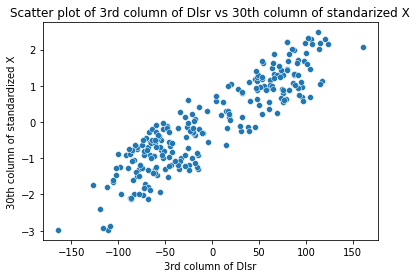

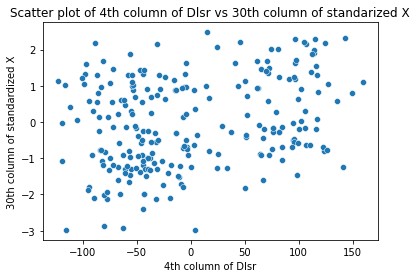

In [25]:
# Plot scatter plots required 
sns.scatterplot(dlsr_df[2], X_df[9*X1 + 2])
plt.xlabel("3rd column of Dlsr")
plt.ylabel("30th column of standardized X")
plt.title("Scatter plot of 3rd column of Dlsr vs 30th column of standarized X")
plt.savefig("plots/scatterplot_3rdDlsr_vs_X")
plt.show()

sns.scatterplot(dlsr_df[3], X_df[9*X1 + 2])
plt.xlabel("4th column of Dlsr")
plt.ylabel("30th column of standardized X")
plt.title("Scatter plot of 4th column of Dlsr vs 30th column of standarized X")
plt.savefig("plots/scatterplot_4thDlsr_vs_X")
plt.show()

### Question 2.2

In [26]:
def solve_RR(lambda_value, DTD, DTX):
    """
    Solve Ridge Regression (RR) Model given :
    lambda_value : the regularization term in RR, integer
    DTD : Product of Transpose of D and D, numpy array
    DTX : Product of Transpose of D and standardised X,numpy array
    
    Return : 
        A_rr : Retrieval of SM, numpy array
        D_rr : Retrieval of TC, numpy array
    """
    lamda_hat = lambda_value * V
    I = np.identity(6)
    Z = DTD + np.dot(lamda_hat, I)
    Z_inv = np.linalg.inv(Z)
    A_rr = np.dot(Z_inv, DTX)
    D_rr = np.dot(X, np.transpose(A_rr))
    return A_rr, D_rr

In [27]:
# Solve RR with lambda value = 0.5 
A_rr, D_rr = solve_RR(0.5, DTD, DTX)

In [28]:
# Construct a Perason correlation of TC and D of LSR and RR 
from scipy.stats import pearsonr

ctlsr = []
ctrr = []
for i in range(NUM_SOURCE):
        corr, _ = pearsonr(TC[i], D_lsr[i])
        ctlsr.append(corr)
        
        corr2, _ = pearsonr(TC[i], D_rr[i])
        ctrr.append(corr2)
        
print("Sum of CtRR greater than Sum of CtLSR: ", sum(ctrr) > sum(ctlsr))
print("Sum of CtRR: " + str(sum(ctrr)))
print("Sum of CtLSR: " + str(sum(ctlsr)))

Sum of CtRR greater than Sum of CtLSR:  False
Sum of CtRR: 5.2412034132558
Sum of CtLSR: 5.249264324383217


In [29]:
# Solve RR with lambda value = 1000
Arr_alt, Drr_alt = solve_RR(1000, DTD, DTX)

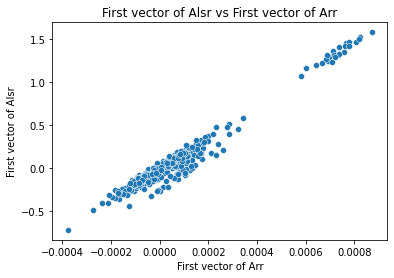

In [30]:
Arr_alt_df = pd.DataFrame(Arr_alt)
Arr_alt_df = Arr_alt_df.T

alsr_df = pd.DataFrame(A_lsr)
alsr_df = alsr_df.T

# Plot First vector of Alsr vs First vector of Arr
sns.scatterplot(Arr_alt_df[0], alsr_df[0])
plt.xlabel("First vector of Arr")
plt.ylabel("First vector of Alsr")
plt.title("First vector of Alsr vs First vector of Arr")
plt.savefig("plots/arr_vs_alsr")

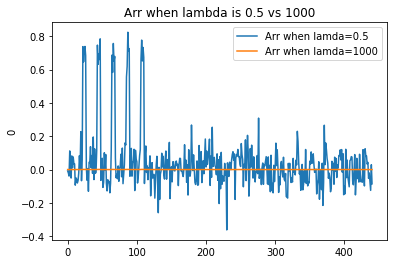

In [31]:
Arr_df = pd.DataFrame(np.transpose(A_rr))
# Plot Arr when lambda is 0.5 vs 1000
sns.lineplot(data=Arr_df[0], label='Arr when lamda=0.5')
sns.lineplot(data=Arr_alt_df[0], label='Arr when lamda=1000')
plt.title("Arr when lambda is 0.5 vs 1000")
plt.savefig("plots/arr_lambda")

In [32]:
Alsr_df = pd.DataFrame(A_lsr)
Drr_df = pd.DataFrame(D_rr)

In [33]:
tc_df = pd.DataFrame(TC)
X_df.to_csv("datafile/X.csv")
sm_df.to_csv("datafile/SM.csv")
tc_df.to_csv("datafile/TC.csv")
Arr_df.to_csv("datafile/Arr.csv")
Drr_df.to_csv("datafile/Drr.csv")

In [34]:
def contruct_X(i):
    """
    Construct X and output the data into a csv file with coress
    """
    temp_noise = contruct_gaussian_noise(0.0, 0.25, N)
    temp_noise = temp_noise.reshape((N,NUM_SOURCE))

    spatial_noise = contruct_gaussian_noise(0.0, 0.015, V)
    spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

    X = np.dot((TC + temp_noise), (SM + spatial_noise))
    X_df = pd.DataFrame(X)
    
    X_df.to_csv("datafile/X" + str(i) + ".csv")
    return

for i in range(10):
    contruct_X(i+1)

### Q2.3 onwards in another notebook¶